<a href="https://colab.research.google.com/github/MANOJ-S-NEGI/ADABOOST_ML/blob/main/ADABOOST_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ADABOOST

### DATASET : CAR DEKHO

AdaBoost (Adaptive Boosting) is an ensemble learning algorithm that combines the predictions of multiple base estimators (usually decision trees) to improve overall predictive performance.

It focuses on learning from the mistakes of the weak learners and assigns more weight to misclassified samples.

**How AdaBoost works:**

**1. Initialization:**
-  All data points are given equal weight.

**2. Iteration:**

- **Fit a Weak Learner:** Train a weak learner (typically a decision tree with a small depth) on the data. The weak learner's performance is only slightly better than random guessing.

- **Compute Error:** Calculate the error rate of the weak learner. This is the proportion of misclassified samples.

- **Compute Weight:** Assign a weight to the weak learner based on its error rate. A lower error rate leads to a higher weight.

- **Update Weights:** Adjust the weights of the misclassified samples. Misclassified samples are given higher weight so that they are more likely to be correctly classified in the next iteration.

- **Combine Predictions:** Combine the predictions of all weak learners. Stronger emphasis is given to the predictions of the weak learners with higher weights.

- **Final Prediction:** The final prediction is made by summing up the weighted predictions.

**Advantages of AdaBoost:**

**1. High Accuracy:**
- AdaBoost is known for its high accuracy and is less prone to overfitting compared to individual weak learners.

**2. Versatility:**
- It can be used with a variety of base estimators, not just decision trees.

**3. Handles Both Classification and Regression:**
- AdaBoost can be used for both classification and regression tasks.

**4. Feature Importance:**
- AdaBoost provides a way to calculate feature importance, which can be useful for understanding which features are contributing the most to the model's predictions.



**Disadvantages of AdaBoost:**

**1. Sensitivity to Noisy Data and Outliers:**
- AdaBoost can be sensitive to noisy data and outliers. It may try to fit the noisy data, leading to overfitting.

**2. Computationally Intensive:**
- It can be computationally intensive, especially when using a large number of weak learners or complex base estimators.

**3. Less Interpretable:**
- The final model produced by AdaBoost can be less interpretable compared to a single decision tree.

**4. Requires Sufficient Data:**
- AdaBoost may not perform well on very small datasets or datasets with high noise.

**5. Less Control Over Individual Weak Learners:**
- AdaBoost does not allow much control over the individual weak learners. It focuses on improving the ensemble's performance as a whole.

In [1]:
## importing th libraies:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:

## reading csv file
data = pd.read_csv("/content/car_dekho_clean.csv")
print(f"data shape : {data.shape}")
data.sample(1)

data shape : (6717, 13)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_kmpl,engine_cc,max_power_bhp,torque_kgm,rpm
1562,2000,45000,50000,Petrol,Individual,Manual,Second Owner,4.0,16.1,796.0,37.0,6.02,2500.0


In [3]:
### checking the null values
print(f"\n null values:\n {data.isnull().sum()}\n")

## checking the sample:
print(f"\ndata_shape\n: {data.shape}\n")


## checking duplicated values:
print(f"duplicated values: {data.duplicated().sum()}\n")

# checking the info
data.info()


 null values:
 year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
seats            0
mileage_kmpl     0
engine_cc        0
max_power_bhp    0
torque_kgm       0
rpm              0
dtype: int64


data_shape
: (6717, 13)

duplicated values: 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6717 entries, 0 to 6716
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6717 non-null   int64  
 1   selling_price  6717 non-null   int64  
 2   km_driven      6717 non-null   int64  
 3   fuel           6717 non-null   object 
 4   seller_type    6717 non-null   object 
 5   transmission   6717 non-null   object 
 6   owner          6717 non-null   object 
 7   seats          6717 non-null   float64
 8   mileage_kmpl   6717 non-null   float64
 9   engine_cc      6717 non-null   float64
 10  max_power_bhp  6717 non-null   flo

<ipython-input-24-570ecbfcc647>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap='cool',annot=True);


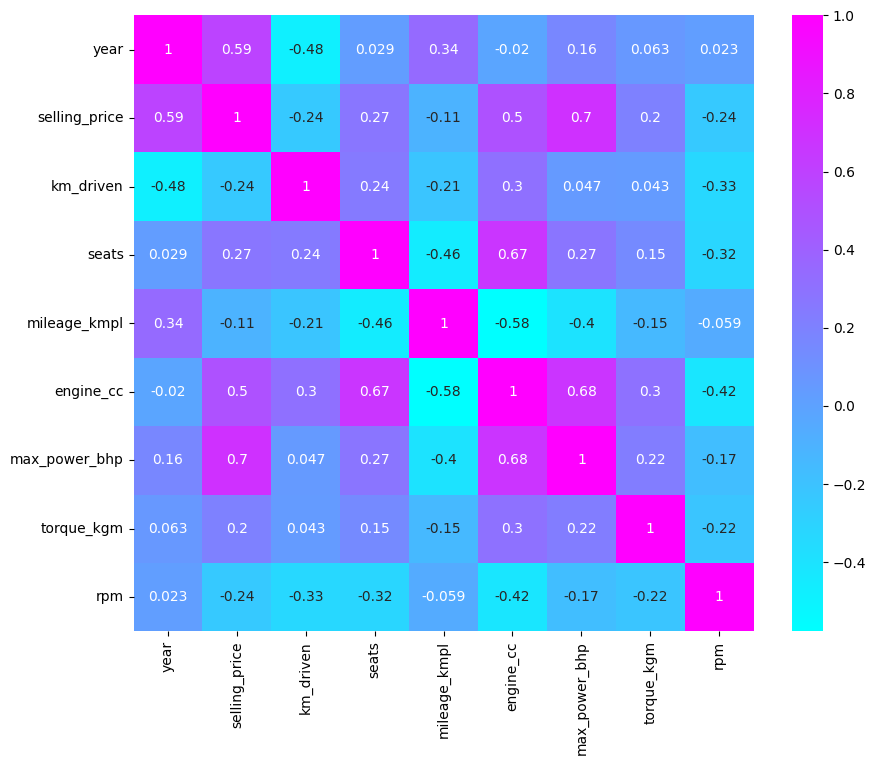

In [24]:
##plotting heatmap:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='cool',annot=True);

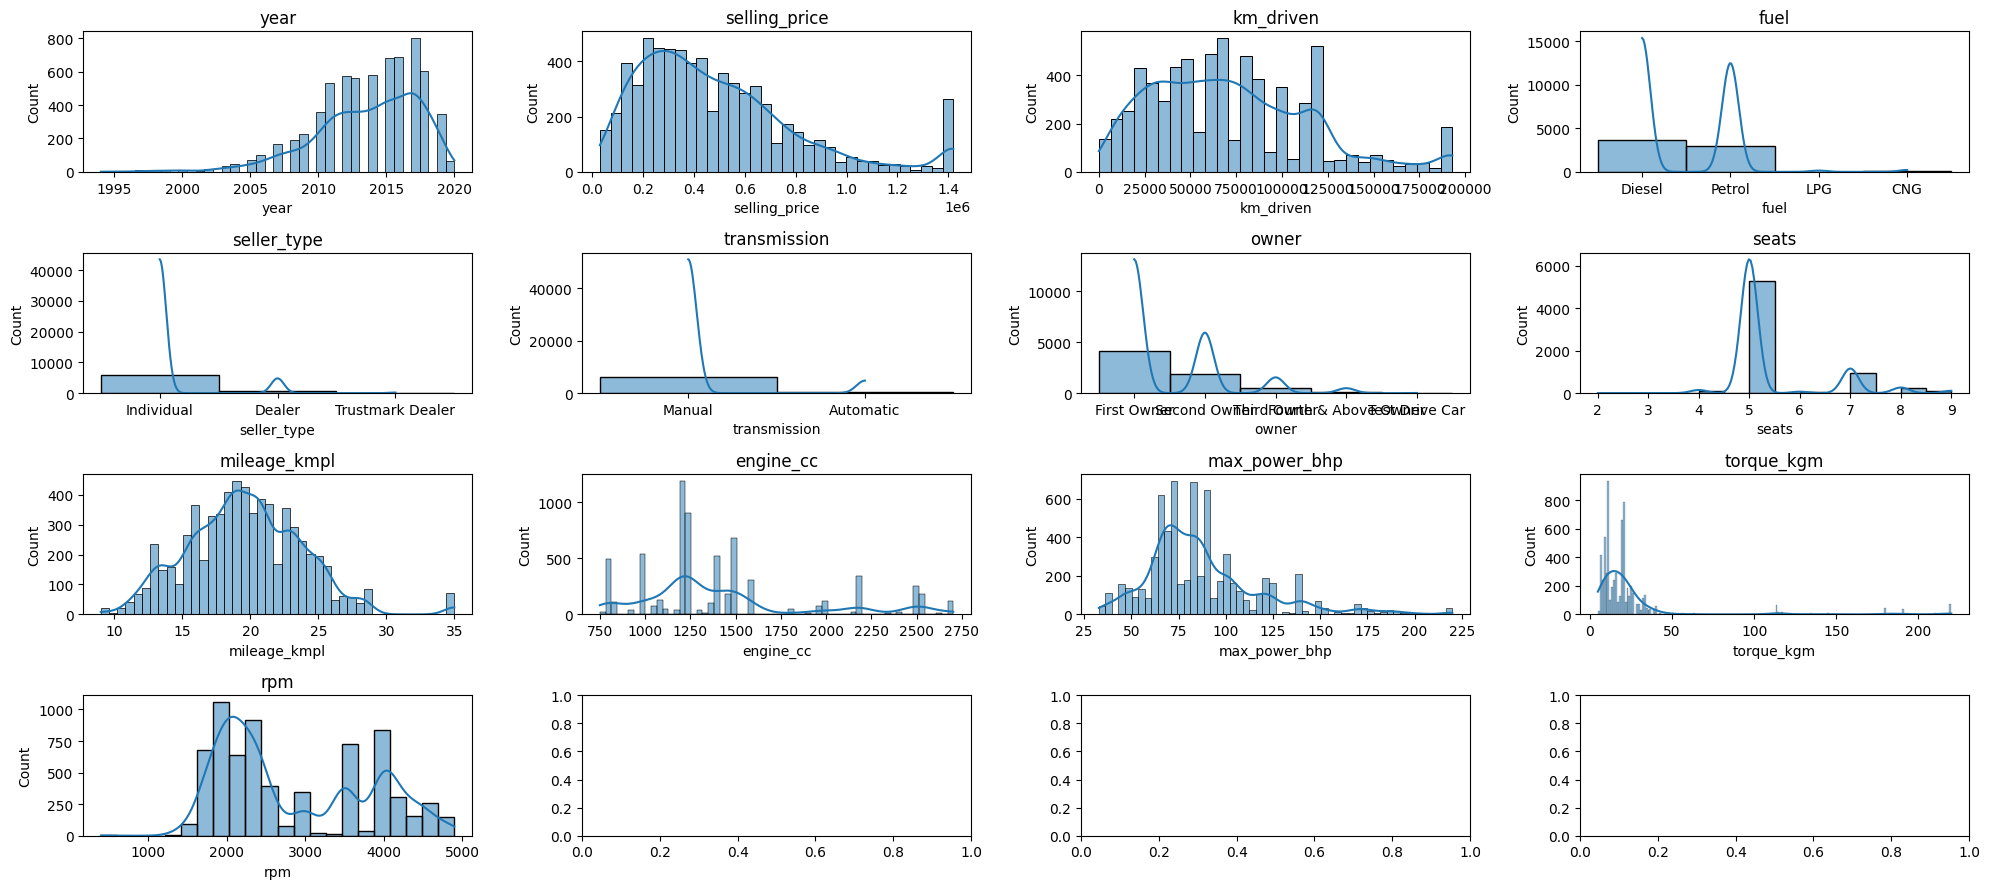

In [9]:
## ploting histplot:

num_rows = 4
num_cols = 4

# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 9))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

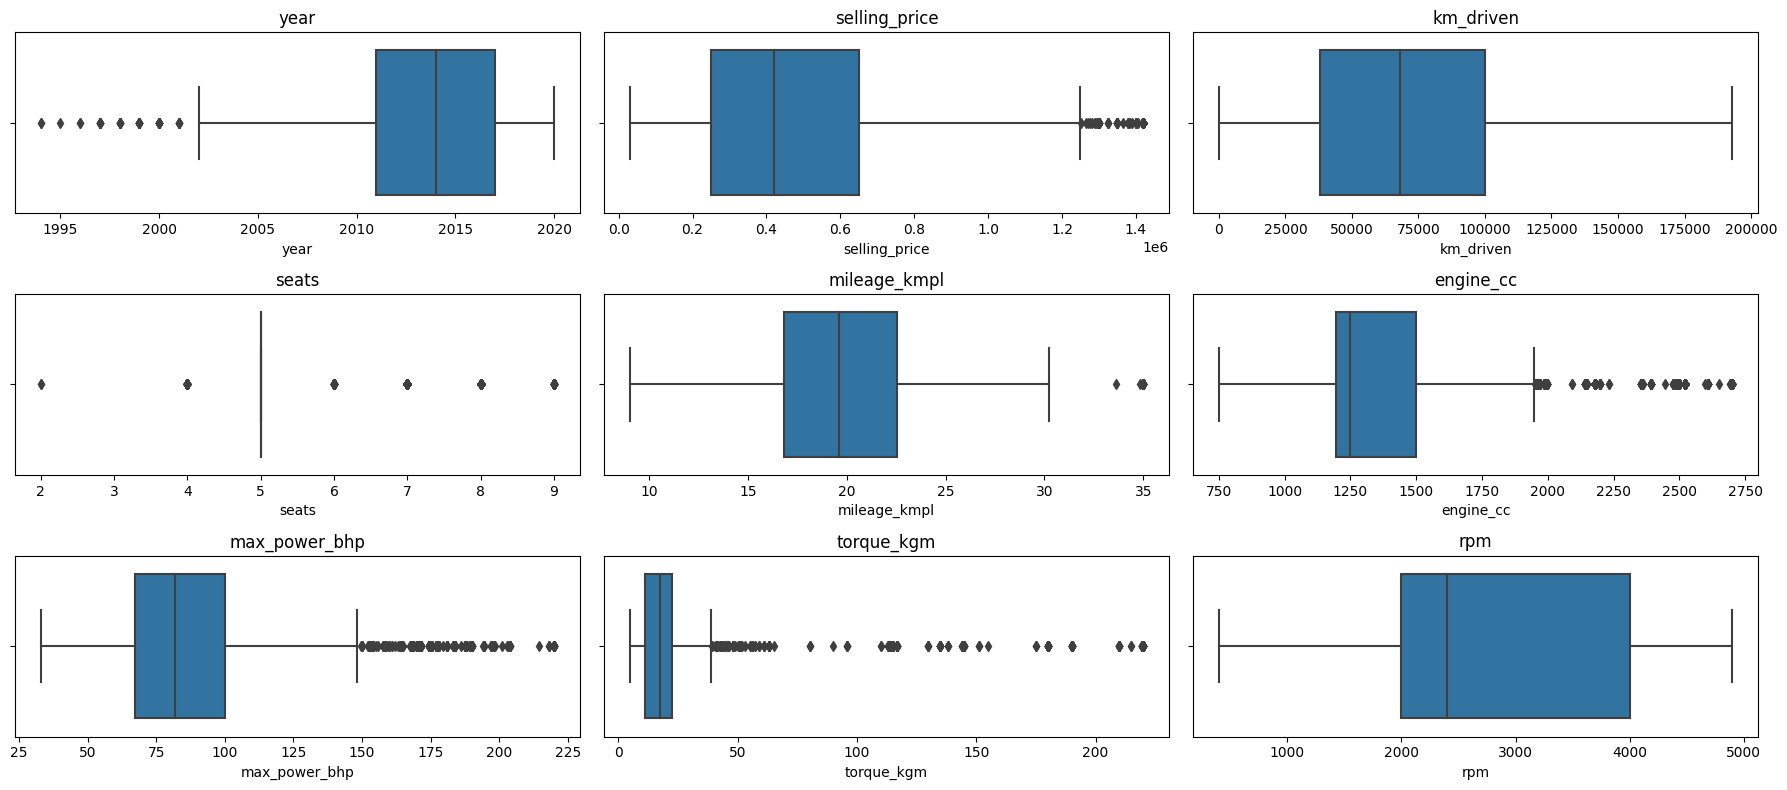

In [34]:
numerical_col = []
categorical_col = []
# Iterate through columns and check if they are numeric
for i in data.columns:
    if pd.api.types.is_numeric_dtype(data[i]):
        numerical_col.append(i)
    else:
        categorical_col.append(i)


num_rows = 3
num_cols = 3



# Creating grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 8))

# Flatten the axes array so you can loop through it easily
axes = axes.flatten()

# Loop through the columns and plot KDEs
for i, col in enumerate(numerical_col):
    sns.boxplot(data=data[numerical_col],x = col,ax=axes[i])
    axes[i].set_title(col)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6717.0,2013.611136,3.897402,1994.0,2011.0,2014.00,2017.00,2020.0
selling_price,6717.0,487408.478487,318296.193311,29999.0,250000.0,420000.00,650000.00,1420000.0
km_driven,6717.0,71633.997767,43625.945858,1.0,38000.0,68203.00,100000.00,193000.0
seats,6717.0,5.430847,0.968006,2.0,5.0,5.00,5.00,9.0
mileage_kmpl,6717.0,19.633220,4.226991,9.0,16.8,19.61,22.54,35.0
engine_cc,6717.0,1427.290606,480.526295,750.0,1197.0,1248.00,1498.00,2702.0
max_power_bhp,6717.0,87.591366,30.814253,32.8,67.1,81.83,100.00,220.0
torque_kgm,6717.0,24.393050,33.687235,4.8,11.4,17.55,22.40,220.0
rpm,6717.0,2861.756067,952.442428,400.0,2000.0,2400.00,4000.00,4900.0


In [25]:
## spliting data into features and target values:
x = data.drop(columns = ["selling_price"],axis = 1)
y = data["selling_price"]
print(f"shape of feature dataset:{x.shape}")

shape of feature dataset:(6717, 12)


In [44]:
from sklearn.preprocessing import OneHotEncoder

numerical_col = []
categorical_col = []

# Iterate through columns and check if they are numeric
for i in x.columns:
    if pd.api.types.is_numeric_dtype(x[i]):
        numerical_col.append(i)
    else:
        categorical_col.append(i)

# Extract the categorical data
x_categorical = x[categorical_col]

# Initialize the OneHotEncoder
onehot = OneHotEncoder()

# Fit and transform the categorical data
x_encoded = onehot.fit_transform(x_categorical)


# Convert the result to a DataFrame
x_encoded_df = pd.DataFrame(x_encoded.toarray(), columns=onehot.get_feature_names_out(categorical_col))

# Concatenate the one-hot encoded categorical columns with the numerical columns
x_num_final = pd.concat([x[numerical_col], x_encoded_df], axis=1)

In [45]:
## train test split for traget cooling
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_num_final,y, test_size = 0.2, random_state = 42)
print("shape of x_train{} and have dimension:{}".format(x_train.shape, x_train.ndim))
print("shape of y_train{} and have dimension:{}".format(y_train.shape, y_train.ndim))
print("shape of x_test{}  and have dimension:{}".format(x_test.shape, x_test.ndim))
print("shape of y_test{} and have dimension: {}".format(y_test.shape, x_test.ndim))

shape of x_train(5373, 22) and have dimension:2
shape of y_train(5373,) and have dimension:1
shape of x_test(1344, 22)  and have dimension:2
shape of y_test(1344,) and have dimension: 2


In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# randomForestregressor parameter
## setting hyperparameters
parameters = {
    'criterion': 'squared_error',  # Change to 'mse' for Mean Squared Error
    'max_depth': 5,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 100
}

RFR = RandomForestRegressor(**parameters)

## parameter for adaboost:
ADA_Para = {
            "estimator":RFR,
            "learning_rate" : 0.01
            }
abr = AdaBoostRegressor(**ADA_Para)

In [47]:
ADR_MODEL  = abr.fit(x_train, y_train)
## model prediction:
y_pred = abr.predict(x_test)

In [63]:


## compairing the prediction with truth values:
print("y_pred dimensions :",y_pred.ndim)
print("y_test dimension :", y_test.ndim)
"""
y_pred_flatten = y_pred.flatten()
y_test_flatten = y_test.values.flatten()
print(y_pred_flatten.ndim)
print(y_test_flatten.ndim)
"""



prediction_result = []
Squared_difference = []
absolute_difference = []
j=0
for i in y_test:
    diff = i - y_pred[j]
    prediction_result.append(int(diff))
    j = j+1

for i in prediction_result:
    mse = i*i
    Squared_difference.append(mse)
    absolute_difference.append(abs(i))


prediction_table = pd.DataFrame({'Actual': y_test, 'Predict' : (np.round(y_pred,0)) , "(Actual-preds)" : prediction_result, "Squared_difference":np.round(Squared_difference,2), 'absolute_difference': absolute_difference })


y_pred dimensions : 1
y_test dimension : 1


In [64]:
prediction_table.sample(50)

,Actual,Predict,(Actual-preds),Squared_difference,absolute_difference
5377,200000,247260.0,-47259,2233413081,47259
5190,130000,169551.0,-39550,1564202500,39550
3527,850000,869370.0,-19370,375196900,19370
6454,391000,484064.0,-93063,8660721969,93063
2917,650000,422675.0,227324,51676200976,227324
2531,320000,373337.0,-53336,2844728896,53336
4927,1420000,1218113.0,201886,40757956996,201886
4458,185000,367433.0,-182432,33281434624,182432
1393,775000,804671.0,-29671,880368241,29671
2406,660000,788232.0,-128232,16443445824,128232


In [65]:
## importing performance matrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


## performance matric mean square error:
mse = mse(y_test,y_pred)
print(f"mean_square_error : {mse}")


## Root mean squared error:
rmse = np.sqrt(mse)
print(f"Root_mean_squared_error:{np.round(rmse,1)}")


## performance matric mean absolute error:
mae = mae(y_test,y_pred)
rounded_mae = round(mae, 1)
print(f"mean_absolute_error : {rounded_mae}")


mean_square_error : 18528130334.05551
Root_mean_squared_error:136118.1
mean_absolute_error : 100519.8


In [69]:

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Adjusted R-squared
p = 12
n=len(y_test)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {np.round(adjusted_r_squared,2)}")

R-squared: 0.8179695278032677
Adjusted R-squared: 0.82


---
---